# 1. Import Library

In [53]:
import os
import pickle
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Connect to Database

In [3]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales'
                                  
                                  )

In [4]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


# 3. Load Datase

In [5]:
query = "select * from data" # SQL statement
output = pd.read_sql(query,connection)
print(output.shape)
output

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# 4. Basic Check

In [6]:
output.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [7]:
## Getting all columns form the dataset
output.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [8]:
output.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [9]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


# 5. Exploration

In [10]:
# Univariant Analysis

import sweetviz as sv#importing sweetviz library 
my_application = sv.analyze(output)#syntax to use sweetviz
my_application.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
output.groupby('Status')['Status'].count()

Status
CONVERTED                834
In Progress Negative     626
In Progress Positive     643
Junk Lead               1536
Just Enquiry             760
LOST                     440
Long Term                646
Not Responding          1129
Open                      82
Potential                708
converted                 18
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

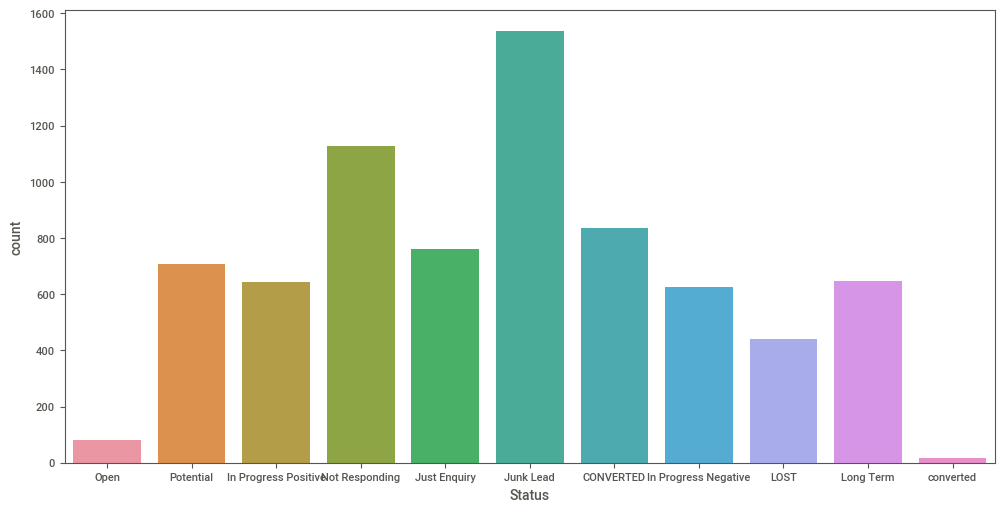

In [12]:
# Exploration Status
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='Status', data=output )

## Data Exploration - Status
* We defined 'Status' as target label
* Status :  Potential 10 % (708 activity) and low potential 90%
* We defined low potentisl : Junklead21%, Not responding 15%, Converted 11%, Just Enquiry 10%, lOng term 9%, in progress positive 9%, in progress negatif 8%, lost 6%, and open 1%.

In [13]:
output.groupby('Product_ID')['Product_ID'].count()

Product_ID
        58
0        2
1      105
10     168
11      12
12      36
13       5
14      27
15    1518
16       3
17       7
18    1711
19    1189
2       38
20     102
21      66
22       8
23       2
24       3
25      90
26      31
27     739
28       1
3        7
4        1
5      487
6        7
7        1
8        6
9      992
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

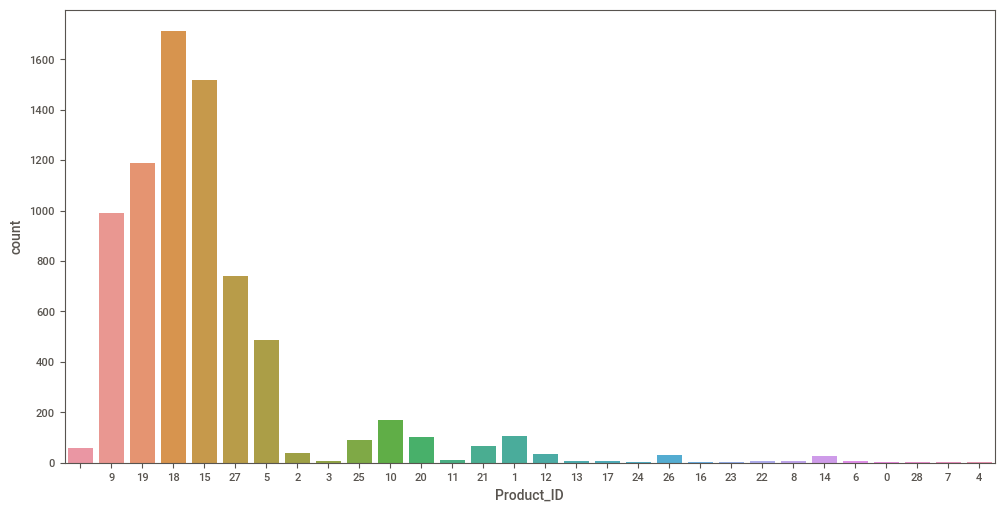

In [14]:
# Exploration Product ID
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='Product_ID', data=output )

## Data Exploration 'Product ID'
* The higher composition for Product ID are 18,15,19,9,27 (72%).

In [15]:
output.groupby('Source')['Source'].count()

Source
                                   17
By Recommendation                  32
CRM form                           23
Call                             2547
Campaign                           19
Customer Referral                 180
E-Mail Message                      1
E-mail Campaign                    12
Existing Client                    51
Existing Customer                  22
Just Dial                          56
Live Chat -PPC                    249
Live Chat-Adwords Remarketing       7
Live Chat-Blog                    237
Live Chat-CPC                      50
Live Chat-Direct                 1834
Live Chat-Google Ads               21
Live Chat-Google Organic          274
Live Chat-Justdial                  1
Live Chat-Quora                     2
Live Chat-Youtube                   2
Other                               2
Personal Contact                   50
SMS Campaign                        2
US Website                        137
Website                          1594
Name:

<AxesSubplot:xlabel='Source', ylabel='count'>

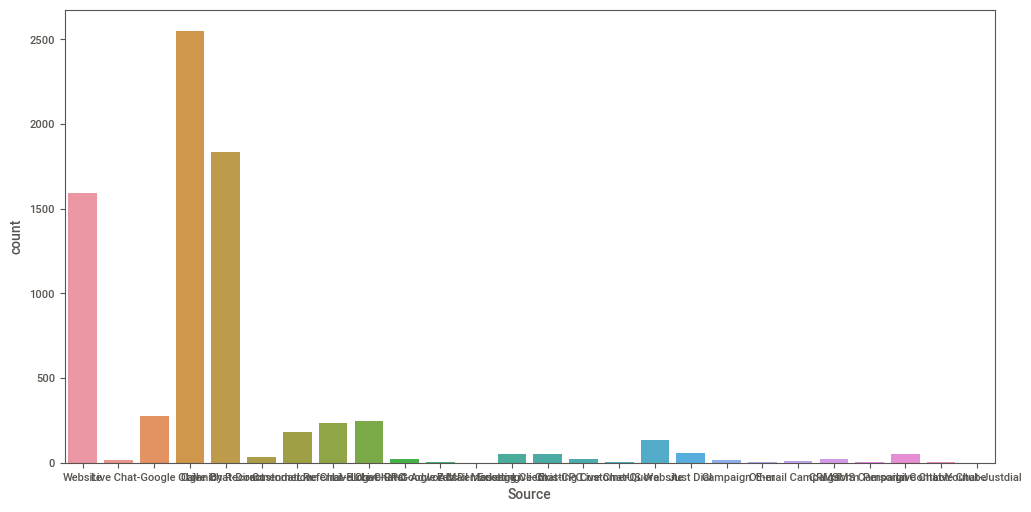

In [16]:
# Exploration Source
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='Source', data=output )

## Data Exploration ' Source'
* Top 3 source of information from Call 34%, Live Chat Direct 25%, and website 21%.

In [17]:
output.groupby('Sales_Agent')['Sales_Agent'].count()

Sales_Agent
                    23
Sales-Agent-1        4
Sales-Agent-10      49
Sales-Agent-11    1420
Sales-Agent-12     269
Sales-Agent-2      389
Sales-Agent-3      781
Sales-Agent-4     1500
Sales-Agent-5     1190
Sales-Agent-6      114
Sales-Agent-7      736
Sales-Agent-8       68
Sales-Agent-9      879
Name: Sales_Agent, dtype: int64

<AxesSubplot:xlabel='Sales_Agent', ylabel='count'>

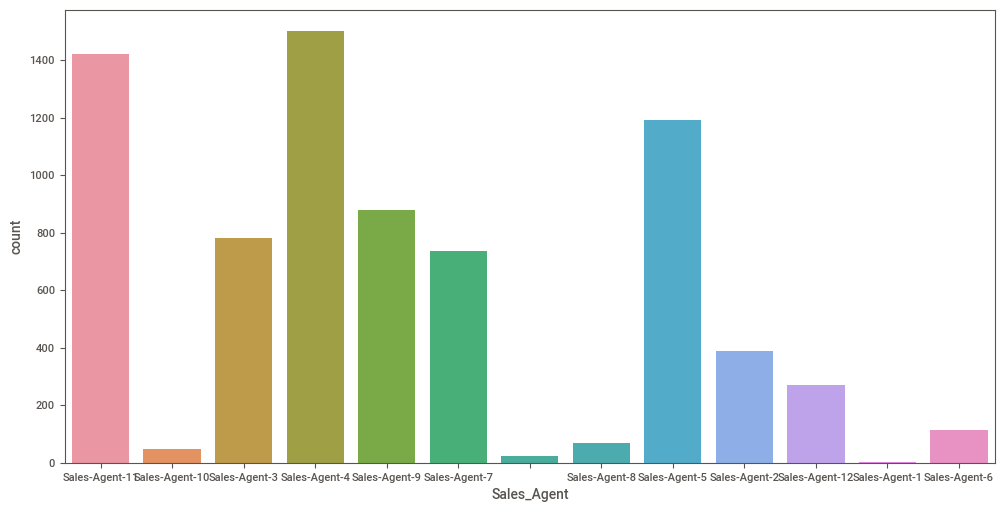

In [18]:
# Exploration Sales Agent
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='Sales_Agent', data=output )

## Data Exploration 'Sales Agent'
### There are 6 sales agent have >= 10% ratio :
* Sales Agent 4 (20%)
* Sales Agent 11 (19%)
* Sales Agent 5 (16%)
* Sales Agent 9 (12%)
* Sales Agent 3 (11%)
* Sales Agent 7 (10%)

In [19]:
output.groupby('Location')['Location'].count()

Location
                     58
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              402
Other Locations    2500
Pune                142
Singapore            17
Trivandrum           58
UAE                  79
UK                   41
USA                  45
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

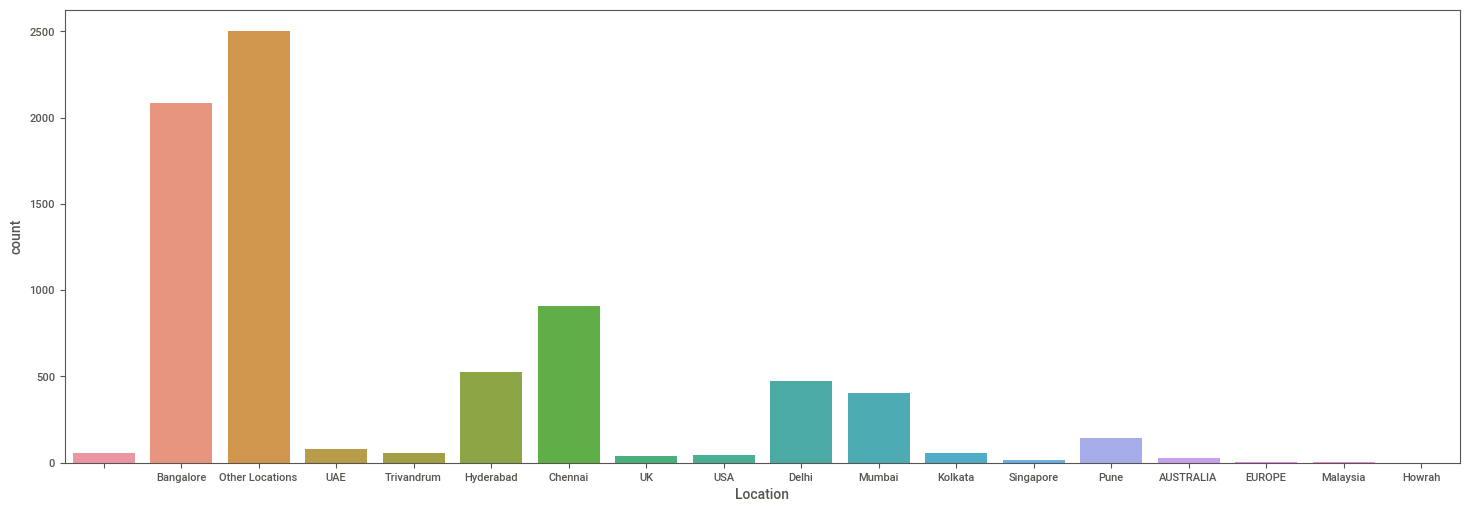

In [57]:
fig, ax = plt.subplots( figsize = (18,6) )
sns.countplot( x='Location', data=output )

## Data Exploration 'Location'
* Top 3 location : Other location 34%, Bungalore 28%, and Chennai 12%


In [21]:
output.groupby('Delivery_Mode')['Delivery_Mode'].count()

Delivery_Mode
Mode-1    2627
Mode-2      11
Mode-3    1688
Mode-4     121
Mode-5    2975
Name: Delivery_Mode, dtype: int64

<AxesSubplot:xlabel='Delivery_Mode', ylabel='count'>

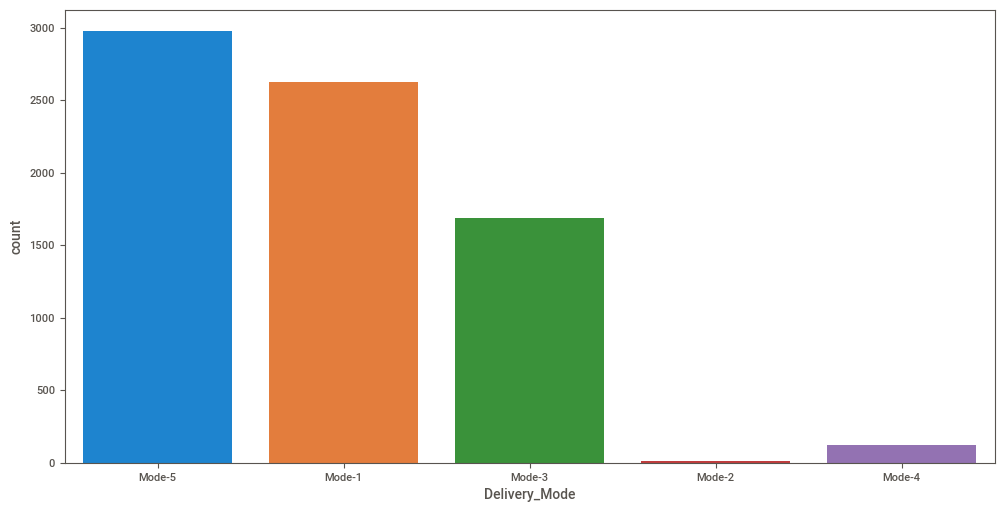

In [22]:
fig, ax = plt.subplots( figsize = (12,6) )
sns.countplot( x='Delivery_Mode', data=output )

## Data Exploration ' Delivery Mode'
* Top 3 'Delivery Mode' : Mode 5 (40%),  mode 1 (35%), and  mode 3 (23%)

In [23]:
output.groupby('Status')['Status'].count()

Status
CONVERTED                834
In Progress Negative     626
In Progress Positive     643
Junk Lead               1536
Just Enquiry             760
LOST                     440
Long Term                646
Not Responding          1129
Open                      82
Potential                708
converted                 18
Name: Status, dtype: int64

<AxesSubplot:>

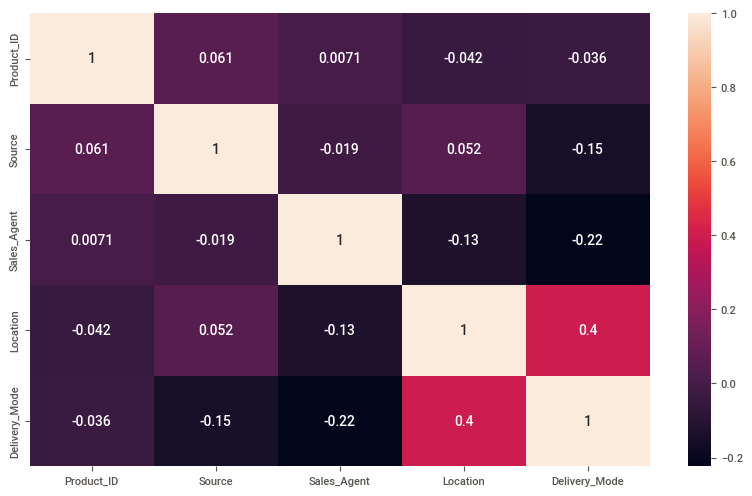

In [58]:
ax = plt.subplots( figsize = (10,6) )
sns.heatmap(df.drop(['Status'],axis=1).corr(),annot=True)

# 6. Preprocessing

In [24]:
# Create new dataset for modelling
df=output.copy()

In [25]:
# Konversi object to float
df['Product_ID'] = pd.to_numeric(df['Product_ID'], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7422 non-null   object 
 3   Mobile         7422 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7422 non-null   object 
 6   Location       7422 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [27]:
df.isnull().sum()

Created           0
Product_ID       58
Source            0
Mobile            0
EMAIL             0
Sales_Agent       0
Location          0
Delivery_Mode     0
Status            0
dtype: int64

In [28]:
# Drop missing value
df = df.dropna(subset=['Product_ID'])


In [29]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [30]:
df.Status.values

array(['Potential', 'Potential', 'Potential', ..., 'Not Responding',
       'Just Enquiry', 'CONVERTED'], dtype=object)

## Convert Categorical data¶

In [31]:
# Define Categorical Feature have correlation with model
categori=['Source','Sales_Agent','Location','Delivery_Mode']

In [32]:
all_labelencoders = {}

for name in categori:
    labelencoder = LabelEncoder()
    all_labelencoders[name] = labelencoder

    labelencoder.fit(df[name] )
    df[name] = labelencoder.transform(df[name] )

In [33]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,17,971XXXXXXX,mXXXXXXX@gmail.com,5,2,0,Potential
19,13-11-2018 18:48,19.0,3,701XXXXXXX,#VALUE!,6,11,4,Potential
24,13-11-2018 17:09,18.0,25,790XXXXXXX,gXXXXXXX@gmail.com,2,14,0,Potential
25,13-11-2018 16:49,15.0,25,970XXXXXXX,aXXXXXXX@gmail.com,9,7,0,Not Responding
26,13-11-2018 16:37,18.0,3,740XXXXXXX,nXXXXXXX@gmail.com,9,2,0,In Progress Positive


## Define Target Label
* 0 = High Potential, from status 'Potential'
* 1 = Low Potential, from other status 

In [34]:
# Change Status Value to 'High Potential' and Low Potential
df["Status"] = np.where(df["Status"] == "Potential", 0, 1)

In [35]:
df.groupby('Status')['Status'].count()

Status
0     708
1    6656
Name: Status, dtype: int64

In [36]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,17,971XXXXXXX,mXXXXXXX@gmail.com,5,2,0,0
19,13-11-2018 18:48,19.0,3,701XXXXXXX,#VALUE!,6,11,4,0
24,13-11-2018 17:09,18.0,25,790XXXXXXX,gXXXXXXX@gmail.com,2,14,0,0
25,13-11-2018 16:49,15.0,25,970XXXXXXX,aXXXXXXX@gmail.com,9,7,0,1
26,13-11-2018 16:37,18.0,3,740XXXXXXX,nXXXXXXX@gmail.com,9,2,0,1


# 7. Create Model

In [37]:
#Independent and dependent variable creation
X=df.drop(["Created","Product_ID","Mobile","EMAIL"],axis=1)
y=df.Status

In [38]:
#Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7.1. XGBClassifier

In [39]:
## Training Model
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(X_train,y_train)# fitting the data


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
#Predict X _test
y_hat=xgb.predict(X_test)#predicting the price
y_hat

array([1, 1, 1, ..., 1, 0, 1])

# 7.2. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [42]:
y_test_rf=rf_clf.predict(X_test)#testing
y_test_rf

array([1, 1, 1, ..., 1, 0, 1])

# 7.3 KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [44]:
y_knn=KNN.predict(X_test)#predicting the price
y_knn

array([1, 1, 1, ..., 1, 0, 1])

# 8. Evaluation Model

# 8.1. Evaluation Model XGBClassifier

In [45]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix# to check model performance
accu_scor_xbr=accuracy_score(y_test,y_hat)
accu_scor_xbr

1.0

In [46]:
print(confusion_matrix(y_test,y_hat))

[[ 138    0]
 [   0 1335]]


In [47]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00      1335

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



# 8.2. Evaluation Model Random Forest

In [48]:
## calculating accuracy test data
accuracy_train_rf = accuracy_score(y_test,y_test_rf)# model traning accuracy  
accuracy_train_rf

1.0

In [49]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00      1335

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



# 8.3. Evaluation Model KNN Classifer

In [50]:
## calculating accuracy test data
accuracy_train_knn = accuracy_score(y_test,y_knn)# model traning accuracy  
accuracy_train_knn

0.9660556687033266

In [51]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78       138
           1       0.97      1.00      0.98      1335

    accuracy                           0.97      1473
   macro avg       0.97      0.83      0.88      1473
weighted avg       0.97      0.97      0.96      1473



# 9. Deployment

## Comparation Model
* XGBClassifer = 100%
* Random Forest = 100%
* KNN           = 96%

#### We can choose XGBClassifier or Random Forest

In [54]:
# open a file, where you ant to store the data
file = open('golden_model', 'wb')

# dump information to that file
pickle.dump(xgb, file)

# close the file
file.close()

In [55]:
model = pickle.load(open('golden_model', 'rb'))

In [56]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

# Conclussion

###  Machine Learning can predict to pre-categorize the lead quality and as result.  We are confident this model can help client to increase in sales effectiveness.  Accuracy of model 100%, we can use Random Forest or XGB Classifier.  But for KNN Clssifier, we can not recommended, because the score below 100%.